# CIAG 2024 - Regressão Logística

## Preâmbulo

O código abaixo consiste dos imports comuns. Além do mais, configuramos as imagens para ficar de um tamanho aceitável e criamos algumas funções auxiliares.
No geral, você pode ignorar a próxima célula.

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 10

plt.style.use('tableau-colorblind10')
plt.ion()

## Criando 2 classes linearmente separáveis

Dando continuidade aos experimentos com classificação e regressão, vamos trabalhar hoje com um dos métodos mais tradicionais em aprendizado de máquina: Regressão Linear (Linear Regression).

Primeiramente, vamos gerar duas classes de forma aleatória de forma que sabemos de antemão que podem ser separados linearmente.

In [ ]:
random_seed = 2024

features, labels = make_blobs(n_samples=5000, random_state=random_seed, centers=2)

print('Feature samples:', type(features), features.shape)
print('Label samples:', type(labels), labels.shape)

for (x_,y_) in zip(features[:5],labels[:5]):
    print(x_, y_)

Feature samples: <class 'numpy.ndarray'> (5000, 2)
Label samples: <class 'numpy.ndarray'> (5000,)
[1.19562895 5.5547415 ] 0
[ -7.62142934 -10.17414924] 1
[2.20428925 3.71256922] 0
[0.09030281 4.93754748] 0
[ -8.46368373 -10.47165395] 1


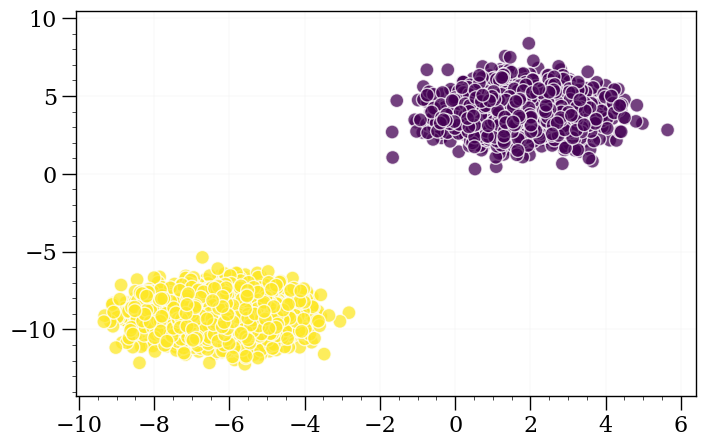

In [ ]:
plt.Figure(figsize=(8, 9))
plt.scatter(features[:,0], features[:,1], c=labels.ravel(), edgecolor='w', alpha=0.75)
plt.show()

## Mapeando eixo X ao eixo Y com SKLEARN e Regressão Lienar

Será que encontramos uma maneira de ajudar uma reta de forma que conseguimos minimizar a soma do quadrado das diferenças?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Assim como na aula anterior, **divida sua base de dados em partições treino/teste** de forma que 70% das amostras estejam no conjunto de treino e o restante no conjunto de teste.

In [ ]:
# Implemente aqui a sua solução
feat_train, feat_test, lbl_train, lbl_test = train_test_split(features, labels, train_size=0.70, random_state=random_seed)

print(feat_train.shape, feat_test.shape)

(3500, 2) (1500, 2)


Se desejamos mapear os valores do eixo X para um valor correspondente no eixo Y, precisaremos, por enquanto, descartar os labels gerados pela função `make_blobs`.

In [ ]:
x_axis, y_axis = feat_train[:,0].reshape(-1,1), feat_train[:,1].reshape(-1,1)

Agora utilizando a classe LinearRegression(), crie um objeto que será responsável em se ajustar as amostras linearmente. Você pode chamar esse objeto de linearR e visualizar os coeficientes e o valor do intercepto imprimindo os seguintes atributos: `coef_` e `intercept_`.

In [ ]:
# API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Implemente aqui a sua solução
linearR = None
linearR = LinearRegression()
linearR.fit(x_axis, y_axis)

print(linearR.coef_, linearR.intercept_)

[[1.53730472]] [0.8617223]


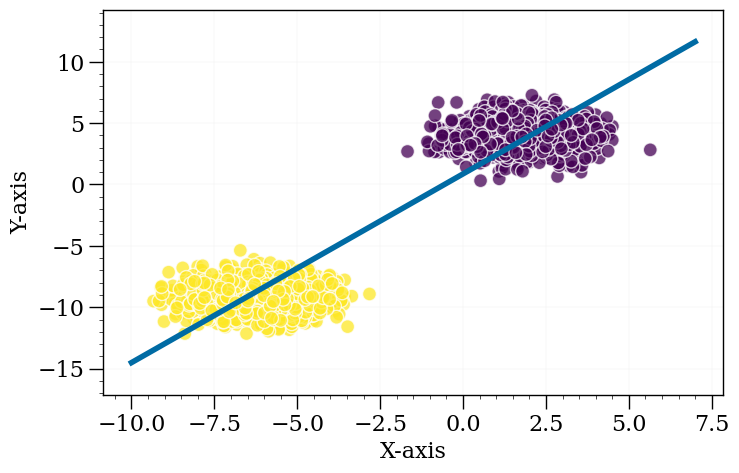

In [ ]:
# Visualize a reta que separa ambas as classes
def get_line(x, a, b=0):
    # Equacao reduzida da reta
    return (a[0] * x) + b

x_line = np.linspace(-10, 7, 100)
y_line = get_line(x_line, linearR.coef_, linearR.intercept_)

plt.Figure(figsize=(8, 9))
plt.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
plt.plot(x_line, y_line)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Abaixo você pode visualizar a predição para as 10 primeiras amostras do teste utilizando a função `predict`. Implemente a mesma funcão realizando o produto interno (`linearR.coef_`) seguido pela soma do intercepto (`linearR.intercept_`) e verifique se os resultados alcançados são os mesmos.

In [ ]:
x_axis_, y_axis_ = feat_test[:,0].reshape(-1,1), feat_test[:,1].reshape(-1,1)

y_pred = linearR.predict(x_axis_)
print(y_pred[:10].ravel())

# Implemente aqui a sua solução
y_pred = (linearR.coef_ * x_axis_) + linearR.intercept_
print(y_pred[:10].ravel())

[ -7.85565562   4.86732005   5.77582585 -10.24248122  -7.76994206
   2.1458662   -8.80686986  -6.3995444   -8.90687235   5.56844675]
[ -7.85565562   4.86732005   5.77582585 -10.24248122  -7.76994206
   2.1458662   -8.80686986  -6.3995444   -8.90687235   5.56844675]


Agora que você já treinou seu modelo, valide seu resultado utilizando o método _score_ com as amostras reservadas para teste e gere um novo gráfico com os resultados.

In [ ]:
# Implemente aqui a sua solução
score = linearR.score(x_axis_, y_axis_)
print(score)

0.9183988574700316


Vamos computar o *overall_score* $S$ manualmente. Para isso, precisamos calcular a soma dos quadrados residuais $u = \sum(y_{true} - y_{pred})^2$ e dividi-la pela soma total das diferenças $v = \sum(y_{true} - \bar{y}_{true})^2$ de tal forma que $S = 1 - \frac{u}{v}$.

In [ ]:
# Implemente aqui a sua solução
y_pred = linearR.predict(x_axis_)
score = 1 -((y_pred - y_axis_)**2).sum()/((y_axis_ - y_axis_.mean())**2).sum()
print(score)

0.9183988574700316


## Trabalhando com SKLEARN e Regressão Linear

Agora utilizando a classe **LinearRegression()**, crie um objeto que será responsável em separar as amostras linearmente. Você pode chamar esse objeto de *linearR* e visualizar os coeficientes e o valor do intercepto imprimindo os seguintes atributos: *coef_* e *intercept_*.

In [ ]:
# API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Implemente aqui a sua solução
linearR = None
linearR = LinearRegression()
linearR.fit(feat_train, lbl_train)

print(linearR.coef_, linearR.intercept_)

[-0.03336496 -0.05475061] 0.28545247480840785


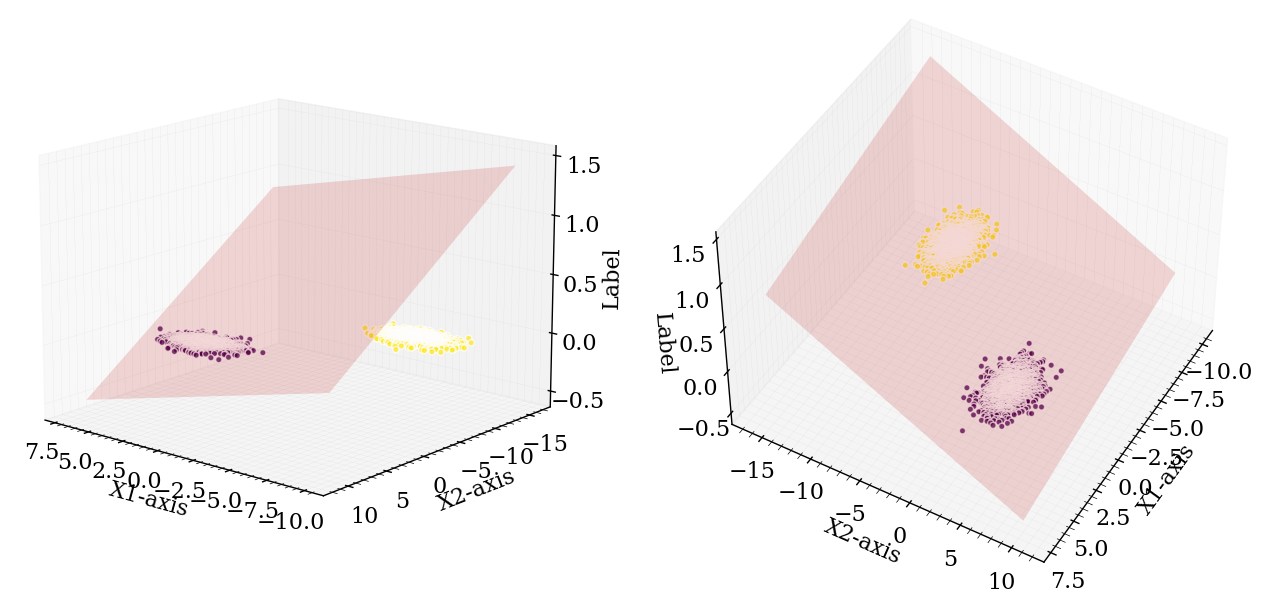

In [ ]:
# Visualize o plano que separa ambas as classes
def get_plane(x1, x2, a, b=0):
    return (a[0] * x1) + (a[1] * x2) + b

x_line, y_line = np.meshgrid(np.linspace(-10, 7, 100), np.linspace(-15, 10, 100))
plane_eq = get_plane(x_line, y_line, linearR.coef_, linearR.intercept_)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=15, azim=130, roll=0)
ax.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Label')

ax = fig.add_subplot(122, projection='3d')
ax.view_init(elev=45, azim=30, roll=0)
ax.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Label')

plt.show()

Agora que você já treinou seu modelo, valide seu resultado com as amostras reservadas para teste e gere um novo gráfico com os resultados.

In [ ]:
# Implemente aqui a sua solução
score = linearR.score(feat_test, lbl_test)
print(score)

0.9827273376223697


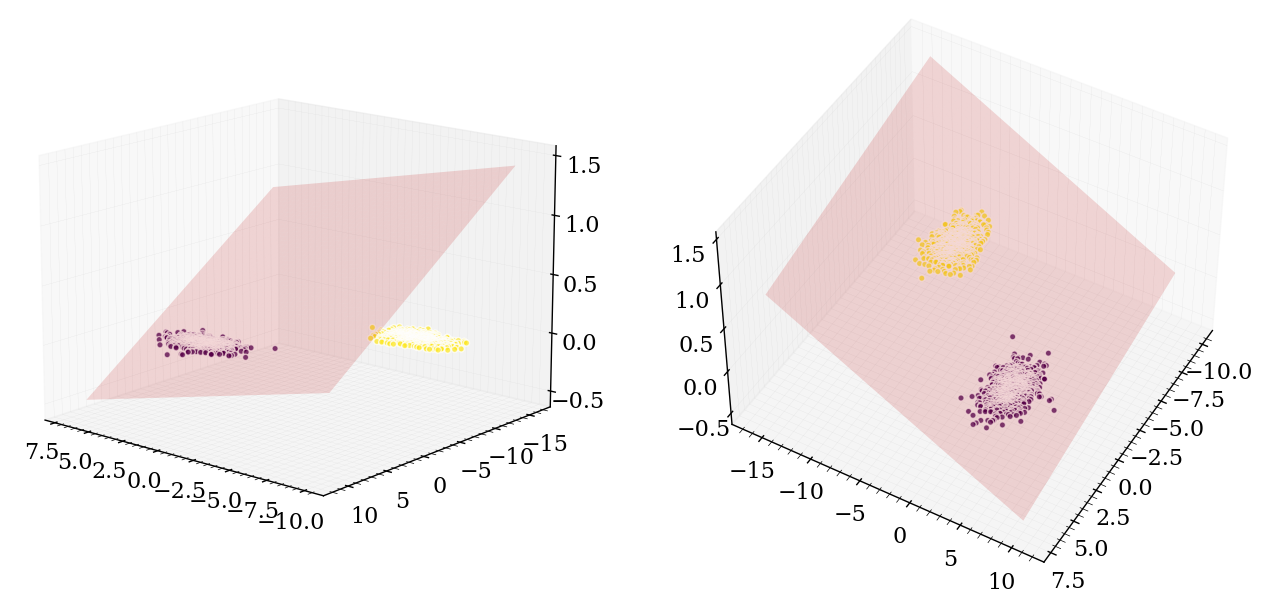

In [ ]:
x_line, y_line = np.meshgrid(np.linspace(-10, 7, 100), np.linspace(-15, 10, 100))
plane_eq = get_plane(x_line, y_line, linearR.coef_, linearR.intercept_)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=15, azim=130, roll=0)
ax.scatter(feat_test[:,0], feat_test[:,1], c=lbl_test.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)

ax = fig.add_subplot(122, projection='3d')
ax.view_init(elev=45, azim=30, roll=0)
ax.scatter(feat_test[:,0], feat_test[:,1], c=lbl_test.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)

plt.show()

## Trabalhando com SKLEARN e Regressão Logística

Utilizando os mesmos conjuntos de dados (mesma repartição), repita todo o processo acima, mas desta vez trabalhando com a Regressão Logística. Voce pode chamar seu modelo de *logR*, inicialmente recebendo o valor None.

In [ ]:
from sklearn.linear_model import LogisticRegression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Implemente aqui a sua solução
logR = None
logR = LogisticRegression(max_iter=25)
logR.fit(feat_train, lbl_train)

print(logR.coef_, logR.intercept_)

[[-0.72077314 -1.18443292]] [-4.67485401]


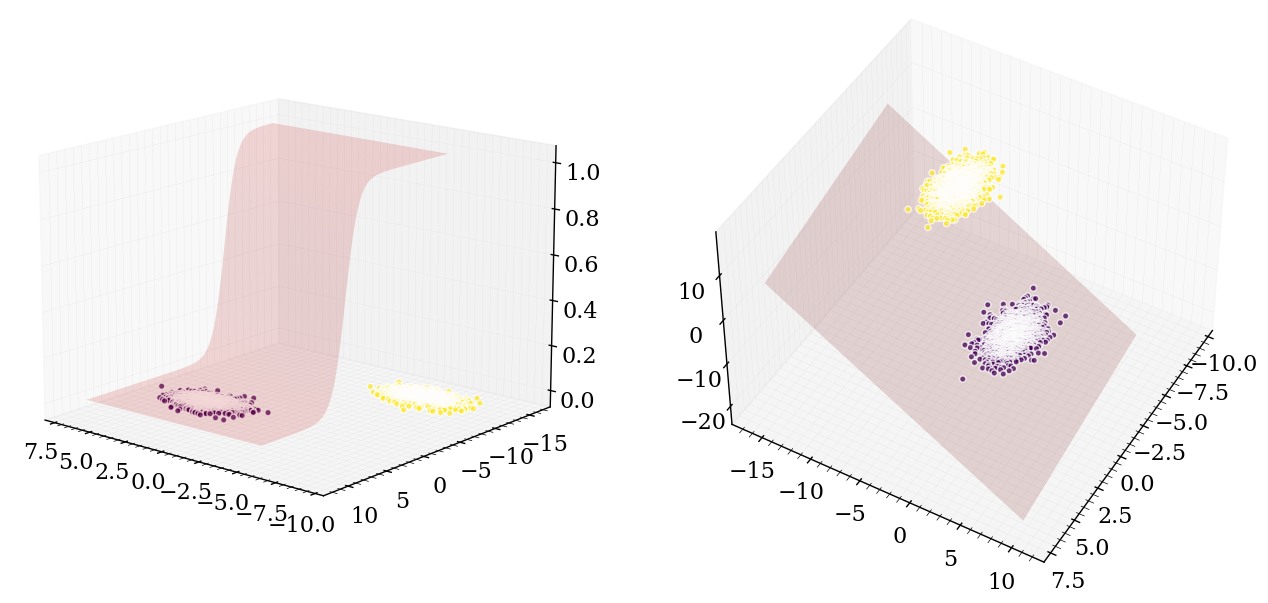

In [ ]:
# Visualize o plano que separa ambas as classes
def get_plane(x1, x2, a, b=0):
    return (a[0,0] * x1) + (a[0,1] * x2) + b

x_line, y_line = np.meshgrid(np.linspace(-5, 7, 100), np.linspace(-15, 10, 100))
plane_eq = get_plane(x_line, y_line, logR.coef_, logR.intercept_)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=15, azim=130, roll=0)
ax.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, sigmoid(plane_eq), color='r', alpha=0.15)

ax = fig.add_subplot(122, projection='3d')
ax.view_init(elev=45, azim=30, roll=0)
ax.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)

plt.show()

Agora que você já treinou seu modelo, valide seu resultado com as amostras reservadas para teste e gere um novo gráfico com os resultados.

In [ ]:
# Implemente aqui a sua solução
score = logR.score(feat_test, lbl_test)
print(score)

1.0


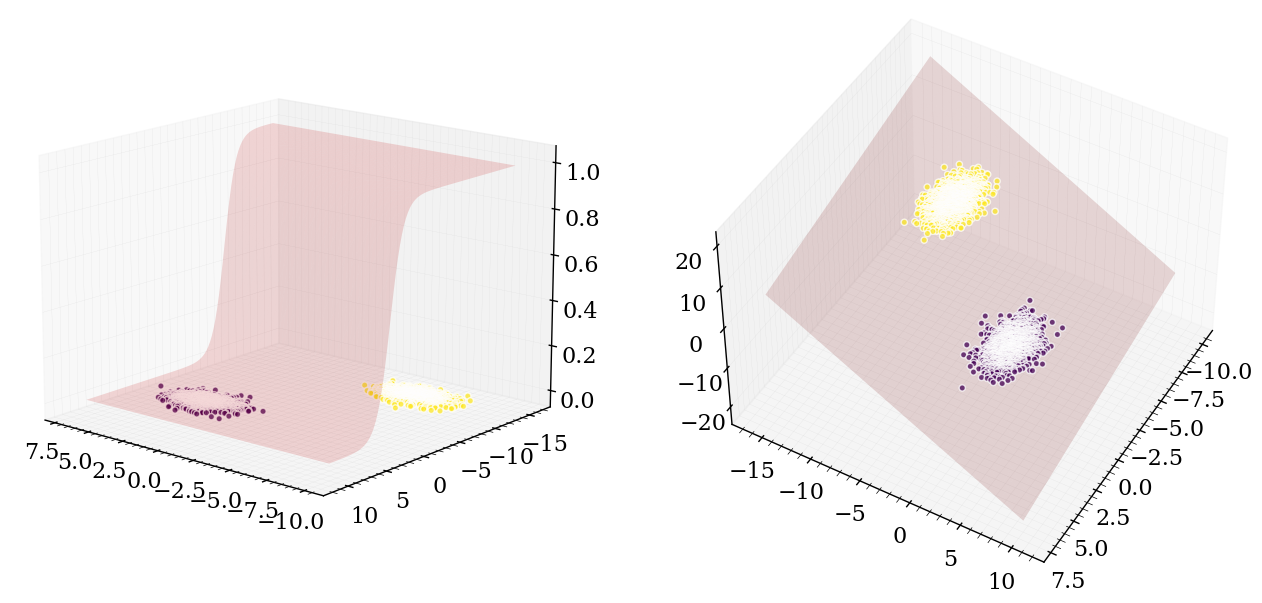

In [ ]:
x_line, y_line = np.meshgrid(np.linspace(-10, 7, 100), np.linspace(-15, 10, 100))
plane_eq = get_plane(x_line, y_line, logR.coef_, logR.intercept_)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=15, azim=130, roll=0)
ax.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, sigmoid(plane_eq), color='r', alpha=0.15)

ax = fig.add_subplot(122, projection='3d')
ax.view_init(elev=45, azim=30, roll=0)
ax.scatter(feat_train[:,0], feat_train[:,1], c=lbl_train.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)

plt.show()

## Trabalhando com PYTORCH e Regressão Logística

A partir daqui será um pouco diferente, pois ao invés de utilizarmos a biblioteca **SCIKIT-LEARN (SKLEARN)** para resolver nosso problema de regressão, iremos implementar nossa solução utilizando uma pequena rede neural através do framework **PyTORCH**

### Criando parâmetros para implementação da regressão logística
No bloco abaixo vamos inicializar os pesos de nossa rede, contendo três parâmetros somente, um para cada dimensão dos dados de entrada e mais um para armazenar o intercepto. Perceba que os pesos foram inicializados de forma aleatória.

In [ ]:
torch.manual_seed(random_seed)

# Note que colocaremos o intercepto dentro da matriz de pesos w
W = torch.randn(size=(3, 1), dtype=torch.float64, requires_grad=True)
print('Weight matrix:', W)

Weight matrix: tensor([[-0.0404],
        [ 1.7260],
        [-0.8140]], dtype=torch.float64, requires_grad=True)


No bloco abaixo, precisamos adicionar uma nova dimensão aos dados de entrada para que possa multiplicar o intercepto da matriz de pesos W (weights) definida acima.

In [ ]:
# Com isso, teremos que adicionar o intercepto também nos dados
def add_intercept(X) -> np.ndarray:
    X_new = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
    X_new[:, 0] = 1
    X_new[:, 1:] = X

    return X_new

if features.shape[1] == 2:
    features = add_intercept(features)
print('Features shape:', features.shape)
print('Features example:', features[0])

Features shape: (5000, 3)
Features example: [1.         1.19562895 5.5547415 ]


Para que tudo funcione apropriadamente, temos que converter todos os vetores do tipo array em tensores torch

In [ ]:
print(f'ANTES | Features type: {type(features)} | Labels type: {type(labels)}')
features = torch.from_numpy(features)
labels = torch.from_numpy(labels)
print(f'DEPOIS | Features type: {type(features)} | Labels type: {type(labels)}')

ANTES | Features type: <class 'numpy.ndarray'> | Labels type: <class 'numpy.ndarray'>
DEPOIS | Features type: <class 'torch.Tensor'> | Labels type: <class 'torch.Tensor'>


### Definindo nosso modelo de regressão logística

- Definição da saída do modelo, seguindo a seguinte fórmula: $\hat{y} = \sigma(\textbf{w}^\text{T}\textbf{x}) $.
- A função $\sigma$, também chamada de função de ativação, será uma função logística, assumindo o seguinte formato: $\sigma(z) = \dfrac{1}{1 + \exp(-z)}$.
- A função logística, nesse caso uma _sigmoid_, faz com que a saída seja um valor entre $[0, 1]$, em outras palavras a probabilidade $\mathbb{P}(y = 1)$.

In [ ]:
def model(
    X: torch.tensor,
    W: torch.tensor
):
    def sigmoid(z: torch.tensor):
        return 1 / (1 + torch.exp(-z))

    # O produto escalar resulta em um vetor (n, 1), faremos squeeze para tirar a segunda dimensão que é desnecessária
    return sigmoid(X @ W).squeeze(dim=1)

print('First 5 labels:', labels[:5])
print('First 5 predictions:', model(features, W)[:5])

First 5 labels: tensor([0, 1, 0, 0, 1])
First 5 predictions: tensor([0.0760, 0.0073, 0.6774, 0.0198, 0.0022], dtype=torch.float64,
       grad_fn=<SliceBackward0>)


### Definindo nossa função de risco
Definindo nossa função de custo (risco) para informar o quanto o modelo está errando:

- Definição da função de risco, seguindo a seguinte fórmula:
$ \mathcal{L} = - \frac{1}{n} \sum\limits_{i=1}^n y \ln(\hat{y}) + (1 - y)\ln(1 - \hat{y}) $.
- Essa função de risco recebe o nome de ___negative log-likelihood___ ou também de ___binary cross entropy___.

In [ ]:
def cross_entropy(
    y_pred: torch.tensor,
    y: torch.tensor
):
    return - torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))

lbl_pred = model(features, W)
loss = cross_entropy(lbl_pred, labels)
print('Loss value:', loss) # Perceba que retorna o valor da função de risco e também a derivada associada no parâmetro grad_fn

Loss value: tensor(2.2393, dtype=torch.float64, grad_fn=<NegBackward0>)


Otimizando os parâmetros do modelo através de um _loop_ de treinamento padrão do PyTorch.

In [ ]:
# Definindo hiperarâmetros
n_iters = 100
learning_rate = 0.01

# Definindo o otimizador a ser utilizado (SGD - Stochastic Gradient Descent)
optimizer = optim.SGD((W, ), lr=learning_rate)

# Realizando o loop de treinamento
for i in range(n_iters):
    optimizer.zero_grad() # Passo necessário no PyTorch, sem ele o treinamento não dará certo

    # Computando as derivadas e dando um passo na otimização
    lbl_preds = model(features, W)
    loss = cross_entropy(lbl_preds, labels)
    loss.backward()
    optimizer.step()

    # Printando a performance do modelo
    if (i+1) % 10 == 0:
        print(f'iter {i+1}/{n_iters} => {loss.item():.5f}')

iter 10/100 => 0.49775
iter 20/100 => 0.20478
iter 30/100 => 0.13036
iter 40/100 => 0.09821
iter 50/100 => 0.08032
iter 60/100 => 0.06882
iter 70/100 => 0.06074
iter 80/100 => 0.05470
iter 90/100 => 0.04998
iter 100/100 => 0.04617


Para visualize os parametros (coeficientes) finais de sua rede neural, basta exibi-los após realizar o trainamento.

In [ ]:
print(W)

tensor([[-0.0458],
        [ 1.1808],
        [-1.5004]], dtype=torch.float64, requires_grad=True)


Verificando o separador linear encontrado pelo nosso modelo.

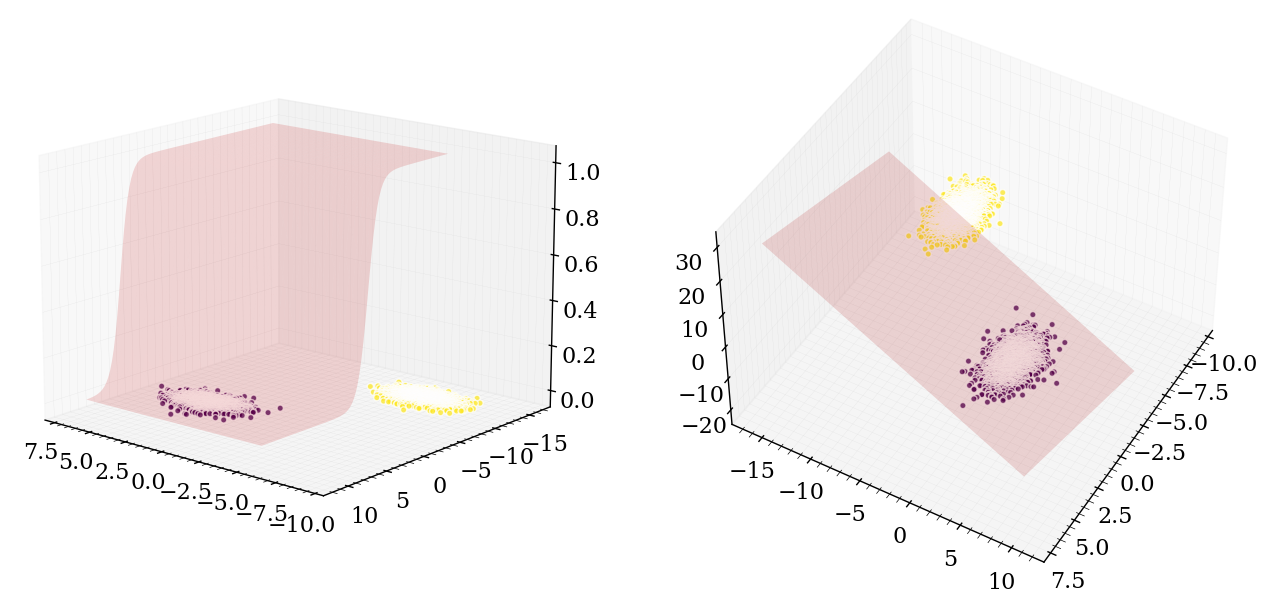

In [ ]:
# Visualize o plano que separa ambas as classes
def get_plane(x1, x2, w):
    return (w[1,0] * x1) + (w[2,0] * x2) + w[0,0]

x_line, y_line = np.meshgrid(np.linspace(-5, 7, 100), np.linspace(-15, 10, 100))
plane_eq = get_plane(x_line, y_line,  W.detach().numpy())

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=15, azim=130, roll=0)
ax.scatter(features[:,1], features[:,2], c=labels.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, sigmoid(plane_eq), color='r', alpha=0.15)

ax = fig.add_subplot(122, projection='3d')
ax.view_init(elev=45, azim=30, roll=0)
ax.scatter(features[:,1], features[:,2], c=labels.ravel(), edgecolor='w', alpha=0.75)
ax.plot_surface(x_line, y_line, plane_eq, color='r', alpha=0.15)

plt.show()

In [ ]:
def logits_to_class(logits: torch.tensor):
    classes = list(map(lambda logit: 1 if logit > 0.5 else 0, logits))
    return torch.tensor(classes, dtype=torch.int64)

logits = model(features, W)
n_corrects = (labels == logits_to_class(logits)).sum()
acc = n_corrects / len(labels)

print(f'Model accuracy: {acc:.3f}')

Model accuracy: 0.992


## Desafio

Agora é com você! Repita os mesmos passos definidos para a tarefa de regressão. Só que desta vez, ao invés de utilizar todo as amostras para treino, separe os dados em duas partições: treino e teste.
Sinta-se livre para explorar uma outra base de dados, como aquela disponível no SKLEARN de diabetes!
A ideia deste exercício é fazer com que você coloque a mão na massa por conta própria, enfrentando os problemas que encontrar ao longo do caminho.